In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/mtcars.csv")

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.shape

(32, 12)

<AxesSubplot:xlabel='hp'>

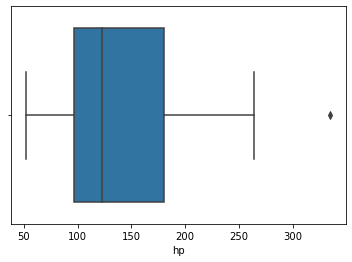

In [5]:
import seaborn as sns
sns.boxplot(data=df,x=df['hp'])

In [6]:
Q1 = df['hp'].quantile(0.25)
print(Q1)

96.5


In [7]:
Q3 = df['hp'].quantile(0.75)
print(Q3)

180.0


In [8]:
IQR = Q3-Q1
print(IQR)

83.5


In [10]:
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print("Lower Whisker: ",Lower_Whisker)
print("Upper Whisker: ",Upper_Whisker)

Lower Whisker:  -28.75
Upper Whisker:  305.25


In [12]:
df = df[df['hp']>Lower_Whisker]

In [13]:
df.shape

(32, 12)

In [14]:
df = df[df['hp']<Upper_Whisker]
df.shape

(31, 12)

<AxesSubplot:xlabel='hp'>

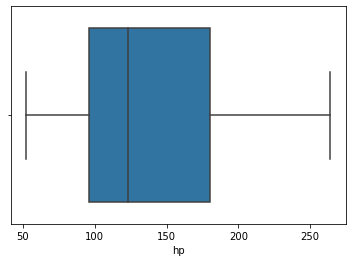

In [15]:
sns.boxplot(data=df,x=df['hp'])

In [16]:
# Z Score Method for treating outliers

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/mtcars.csv")
df.shape

(32, 12)

In [21]:
from scipy import stats
import numpy as np

In [22]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [24]:
z= np.abs(stats.zscore(df.hp))
print(z)

0     0.543655
1     0.543655
2     0.795570
3     0.543655
4     0.419550
5     0.617748
6     1.456847
7     1.254944
8     0.765933
9     0.351014
10    0.351014
11    0.493642
12    0.493642
13    0.493642
14    0.864106
15    1.012291
16    1.234569
17    1.195670
18    1.403130
19    1.210489
20    0.736296
21    0.049086
22    0.049086
23    1.456847
24    0.419550
25    1.195670
26    0.825207
27    0.499199
28    1.738399
29    0.419550
30    2.790515
31    0.558473
Name: hp, dtype: float64


In [26]:
threshold = 2.6
print(np.where(z>2.6))

(array([30]),)


In [28]:
df1 = df[(z<2.6)]
print(df1)
df1.shape

                  model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.

(31, 12)